<a href="https://colab.research.google.com/github/AzisilhamK463/PCVK_2023/blob/main/week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama: Azis Ilham Kurniawan

## NIM: 2141720145

## Kelas: TI-3F

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def display (imaji, cmap='gray'):
  fig = plt.figure(figsize=(10,8))
  ax= fig.add_subplot(111)
  ax.imshow(imaji, cmap='gray')

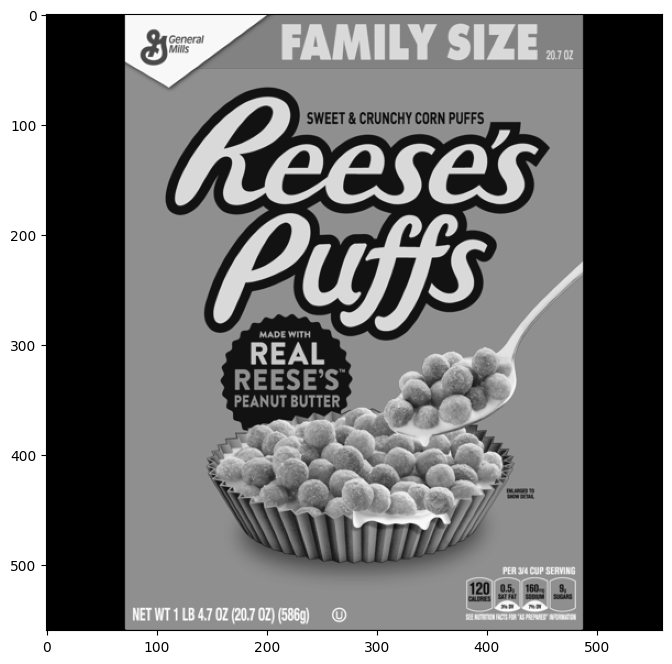

In [6]:
reeses= cv.imread('/content/drive/MyDrive/dataset/facedet/reeses_puffs.png',0)
display(reeses)

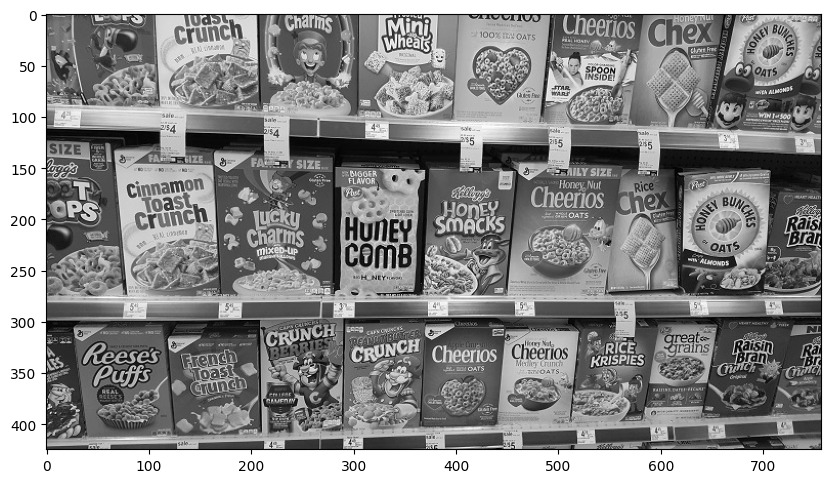

In [7]:
cereal= cv.imread('/content/drive/MyDrive/dataset/facedet/many_cereals.jpg',0)
display(cereal)

In [8]:
orb = cv.ORB_create()
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereal,None)
bf=cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)
single_match=matches[0]
single_match.distance

71.0

In [9]:
len(matches)

139

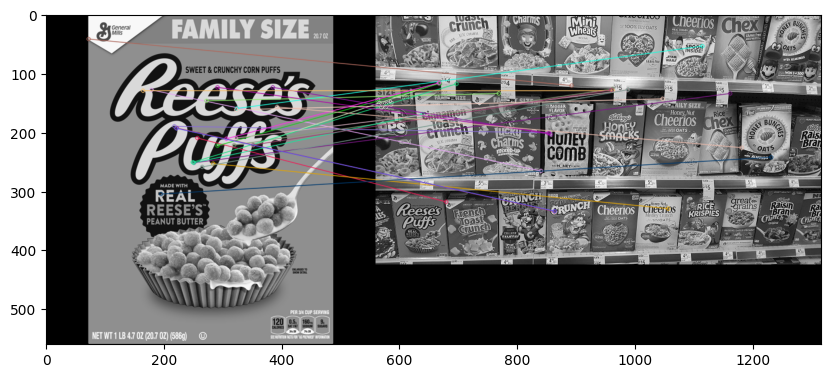

In [10]:
matches = sorted(matches,key=lambda x:x.distance)
resses_match=cv.drawMatches(reeses,kp1,cereal,kp2,matches[:25],None,flags=2)
display(resses_match)

In [11]:
!pip install opencv-contrib-python==4.8.1.78

In [12]:
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereal, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# ratio match1 > 75% Match2
for match1,match2 in matches:
  # jika jarak match1 lebih kecil dari jarak 75% match2
  #descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

In [13]:
len(good)

79

In [14]:
len(matches)

1501

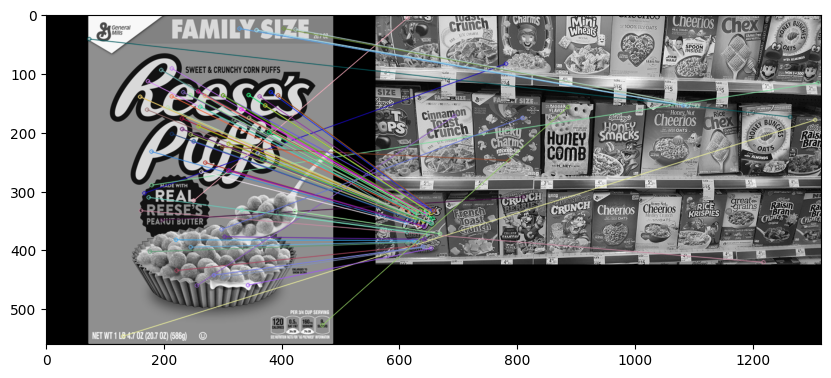

In [15]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereal,kp2,good,None,flags=2)
display(sift_matches)

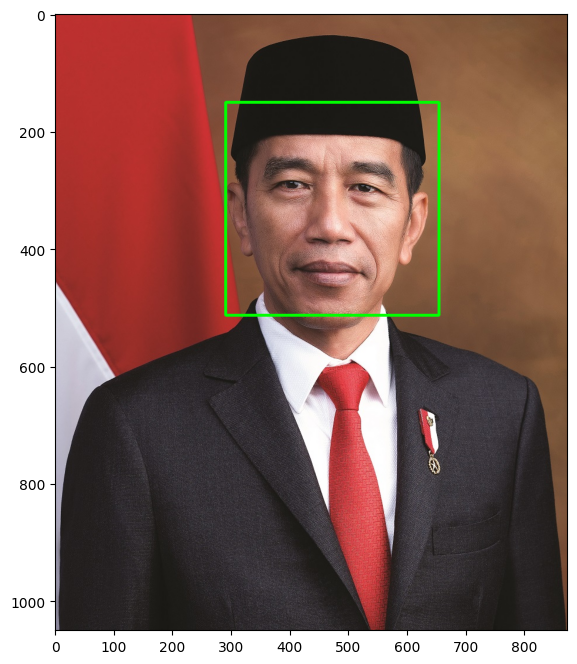

In [29]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')
img = cv.imread('/content/drive/MyDrive/dataset/facedet/jokowi.jpg')

jokowi = cv.cvtColor(img, cv.COLOR_BGR2RGB)

roi_wajah = cascade_wajah.detectMultiScale(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(0,255,0),3)
  plt.figure(figsize = (8,8))
  plt.imshow(jokowi)

In [36]:
def recognitions(pathArray, cascade_paths):
    for i, imagePath in enumerate(pathArray):
        imgOri = cv.imread(imagePath)
        normalImage = cv.cvtColor(imgOri, cv.COLOR_BGR2RGB)
        faci = cv.cvtColor(imgOri, cv.COLOR_BGR2RGB)

        img_height, img_width = normalImage.shape[:2]

        fig, axes = plt.subplots(1, len(cascade_paths) * 2, figsize=(img_width / 100, img_height / 100))  # Adjust scaling factor if needed

        for j, cascade_path in enumerate(cascade_paths):
            cascadi = cv.CascadeClassifier(cascade_path)

            roi_wajah = cascadi.detectMultiScale(normalImage, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Menampilkan normalImage di kolom pertama
            axes[j * 2].imshow(normalImage)
            axes[j * 2].set_title(f'Normal Image, Cascade {j+1}')

            # Menampilkan faci dengan kotak bounding di wajah di kolom kedua
            for (x, y, w, h) in roi_wajah:
                cv.rectangle(faci, (x, y), (x + w, y + h), (0, 255, 0), 3)

            axes[j * 2 + 1].imshow(faci)
            axes[j * 2 + 1].set_title(f'Faci Image, Cascade {j+1}')

        # Menampilkan plot
        plt.tight_layout()
        plt.show()

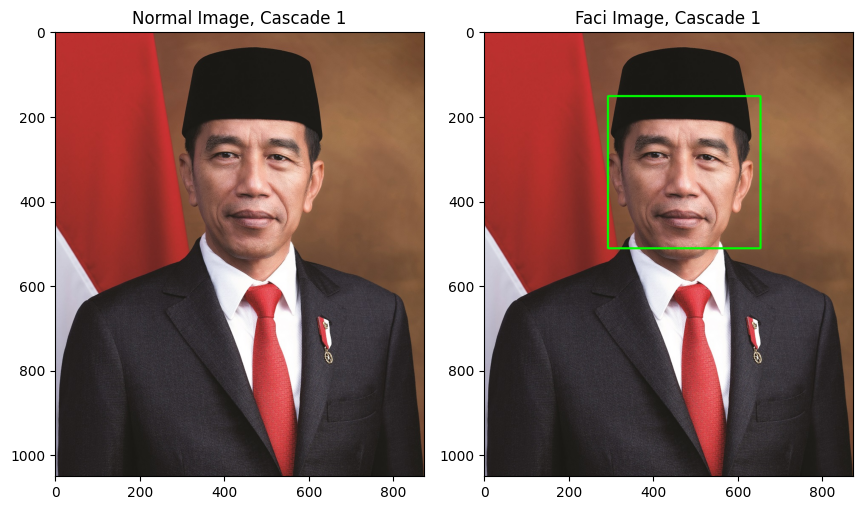

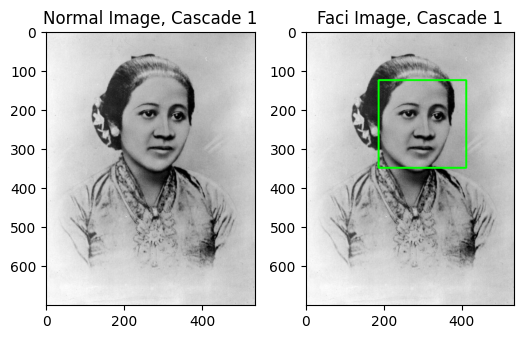

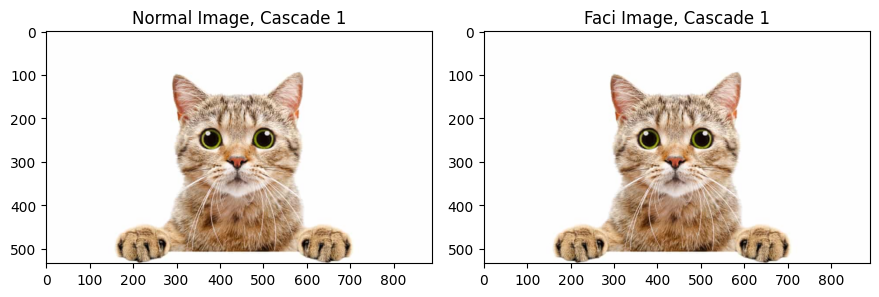

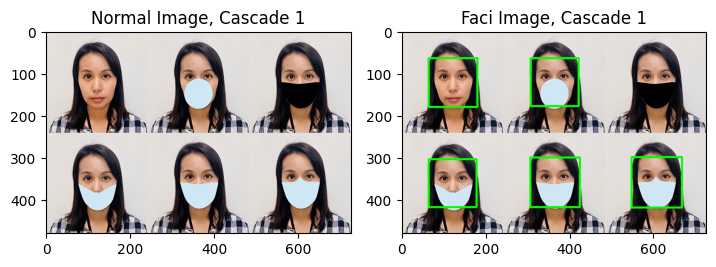

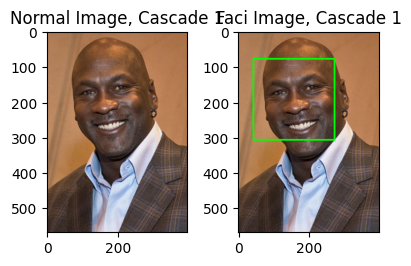

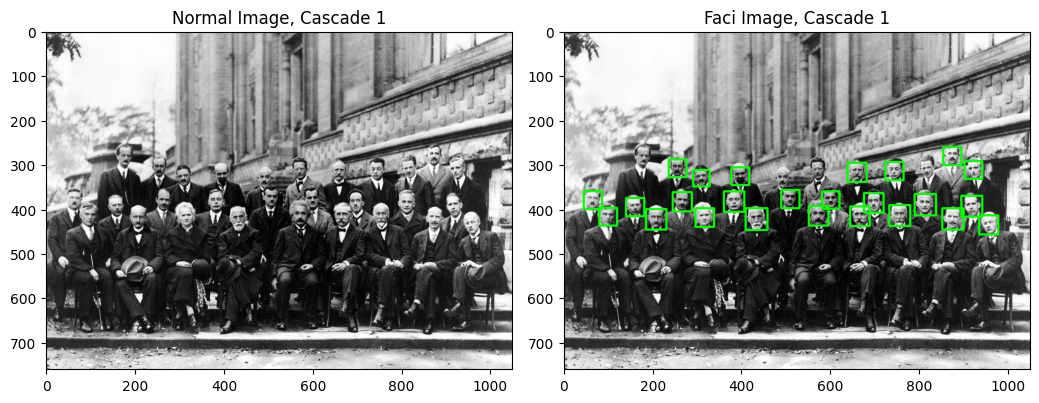

In [37]:
path=['/content/drive/MyDrive/dataset/facedet/jokowi.jpg','/content/drive/MyDrive/dataset/facedet/kartini.jpg','/content/drive/MyDrive/dataset/facedet/kucing.jpg','/content/drive/MyDrive/dataset/facedet/mask.png','/content/drive/MyDrive/dataset/facedet/mjordan.jpg','/content/drive/MyDrive/dataset/facedet/solvayconf.jpg']
cascade=['/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml']

recognitions(path,cascade)

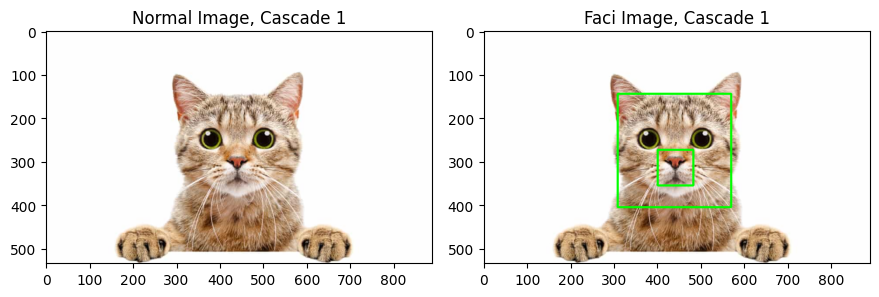

In [38]:
catPath=['/content/drive/MyDrive/dataset/facedet/kucing.jpg']
cascadeCat=['/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalcatface.xml']
recognitions(catPath,cascadeCat)

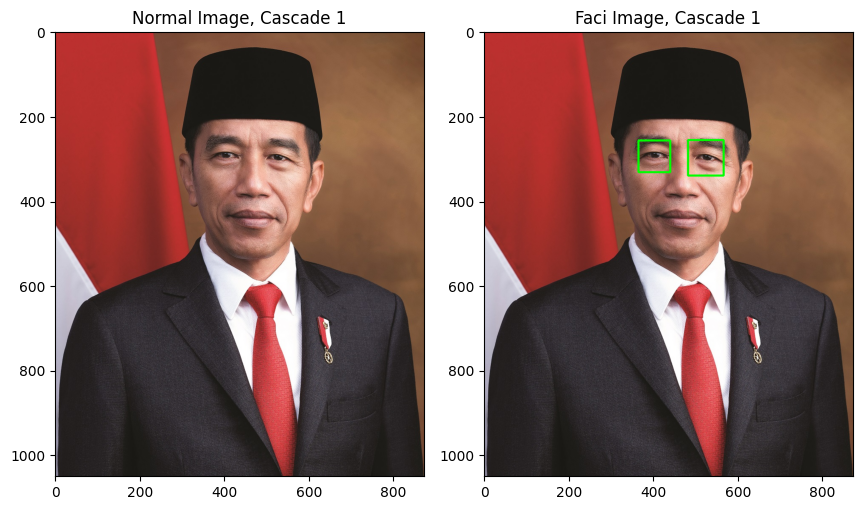

In [40]:
imgJokowi=['/content/drive/MyDrive/dataset/facedet/jokowi.jpg']
cascadeEye=['/content/drive/MyDrive/dataset/haarcascades/haarcascade_eye.xml']
recognitions(imgJokowi,cascadeEye)

<IPython.core.display.Javascript object>

(480, 640)
Saved to Azis.jpg


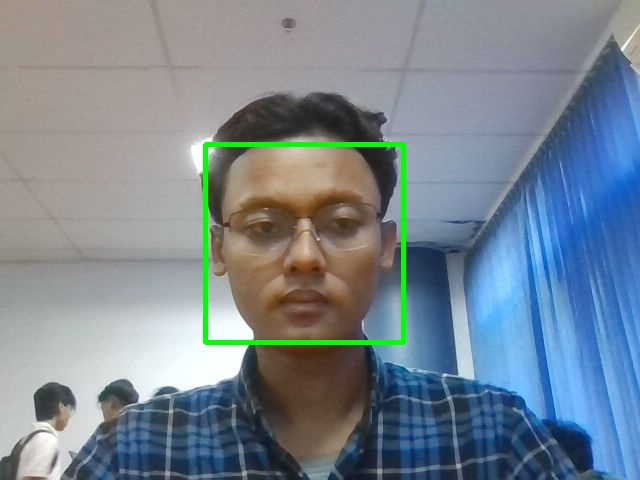

In [43]:
# Face tracking
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')
def take_photo(filename='zalna.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('Azis.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))